## Store Sales
##### Competição do Kaggle sobre previsão de vendas de produtos nas lojas Favorita localizadas no Equador

In [138]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

In [139]:
# Importando a base de treino e a base de teste
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [140]:
# Visualizando os dados de treino
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [141]:
# Visualizando o shape
train.shape

(3000888, 6)

In [142]:
# Visualizando as informações
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [143]:
# Vamos transformar a coluna date de object para 'date'
train['date'] = pd.to_datetime(train['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [144]:
# Verificando a existência de dados nulos
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [145]:
# Vamos transformar o date no dataset de teste também
test['date'] = pd.to_datetime(test['date'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [146]:
# Agora vamos dividir a data em 3 colunas: Ano, mês e dia. Vamos fazer isso tanto no treino quanto no teste
train_2 = train.copy()
test_2 = test.copy()

train_2['year'] = train['date'].dt.year
train_2['month'] = train['date'].dt.month
train_2['day'] = train['date'].dt.day

test_2['year'] = test['date'].dt.year
test_2['month'] = test['date'].dt.month
test_2['day'] = test['date'].dt.day

In [147]:
train_2.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1


In [148]:
test_2.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [149]:
# Vamos remover a coluna date
train_2.drop('date', axis=1, inplace=True)
train_2.head()

,id,store_nbr,family,sales,onpromotion,year,month,day
0,0,1,AUTOMOTIVE,0.0,0,2013,1,1
1,1,1,BABY CARE,0.0,0,2013,1,1
2,2,1,BEAUTY,0.0,0,2013,1,1
3,3,1,BEVERAGES,0.0,0,2013,1,1
4,4,1,BOOKS,0.0,0,2013,1,1


In [150]:
test_2.drop('date', axis=1, inplace=True)
test_2.head()

,id,store_nbr,family,onpromotion,year,month,day
0,3000888,1,AUTOMOTIVE,0,2017,8,16
1,3000889,1,BABY CARE,0,2017,8,16
2,3000890,1,BEAUTY,2,2017,8,16
3,3000891,1,BEVERAGES,20,2017,8,16
4,3000892,1,BOOKS,0,2017,8,16


### Tratando as variáveis categóricas

In [151]:
# Verificando as variáveis categóricas
train_2['family'].nunique()

33

In [152]:
train_2['family'].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [153]:
# Agora vamos separar o train em dados de treino e validação
train_data = train_2[train_2['year'] <= 2015]
validation_data = train_2[train_2['year'] > 2015]

In [154]:
# Vamos utilizar um target encoding para tratar as variáveis categóricas

# Dicionário para armazenar as estatísticas de codificação
encoding_dict = {}

# Calculando as estatísticas de codificação no conjunto de treinamento
encoding_dict['family'] = train_data.groupby('family')['sales'].mean()

In [155]:
# Verificando as estatísticas de codificação
encoding_dict

{'family': family
 AUTOMOTIVE                       5.573921
 BABY CARE                        0.036427
 BEAUTY                           2.911817
 BEVERAGES                     1886.687814
 BOOKS                            0.000000
 BREAD/BAKERY                   424.653498
 CELEBRATION                      5.363519
 CLEANING                      1007.216558
 DAIRY                          611.599783
 DELI                           245.769666
 EGGS                           161.681132
 FROZEN FOODS                   150.883601
 GROCERY I                     3395.659659
 GROCERY II                      20.971408
 HARDWARE                         1.053894
 HOME AND KITCHEN I              14.781831
 HOME AND KITCHEN II             10.759395
 HOME APPLIANCES                  0.476106
 HOME CARE                      112.417379
 LADIESWEAR                       4.790988
 LAWN AND GARDEN                  3.821140
 LINGERIE                         7.756987
 LIQUOR,WINE,BEER                80.

In [156]:
# Aplicando o target encoding no conjunto de treinamento
train_data['family_encoded'] = train_data['family'].map(encoding_dict['family'])

# Aplicando no conjunto de validação
validation_data['family_encoded'] = validation_data['family'].map(encoding_dict['family'])


C:\Users\andre\AppData\Local\Temp\ipykernel_15852\712844837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['family_encoded'] = train_data['family'].map(encoding_dict['family'])
C:\Users\andre\AppData\Local\Temp\ipykernel_15852\712844837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['family_encoded'] = validation_data['family'].map(encoding_dict['family'])


In [157]:
# Deletando as colunas originais
train_data = train_data.drop(['id', 'family'], axis=1)
validation_data = validation_data.drop(['id', 'family'], axis=1)

train_data.head()

,store_nbr,sales,onpromotion,year,month,day,family_encoded
0,1,0.0,0,2013,1,1,5.573921
1,1,0.0,0,2013,1,1,0.036427
2,1,0.0,0,2013,1,1,2.911817
3,1,0.0,0,2013,1,1,1886.687814
4,1,0.0,0,2013,1,1,0.000000


### Criando nosso modelo

In [158]:
# Agora vamos separar as features do target
X_train = train_data.drop('sales', axis=1)
X_val = validation_data.drop('sales', axis=1)

y_train = train_data['sales']
y_val = validation_data['sales']

* Vamos selecionar alguns algoritmos simples para começar:
    * Regressão linear
    * Árvore de regressão
    * KNeighborsRegressor

In [159]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [160]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [161]:
# Fazendo a previsão para os dados de teste
y_rl = reg_rl.predict(X_val)

In [162]:
# Importando a árvore de regressão 
from sklearn import tree

In [163]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [164]:
# Fazendo a previsão
y_ar = reg_ar.predict(X_val)

In [165]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [166]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [167]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_val)

### Vamos avaliar os dados utilizando tanto o erro médio absoluto quanto o quadrático

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [169]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_val, y_rl))
print(mean_squared_error(y_val, y_rl))

347.79890196545114
789797.1896622779


In [170]:
# Avaliando o erro da árvore de decisão
print(mean_absolute_error(y_val, y_ar))
print(mean_squared_error(y_val, y_ar))

194.42167866065498
656043.0223580307


In [171]:
# Avaliando o erro do KNN
print(mean_absolute_error(y_val, y_knn))
print(mean_squared_error(y_val, y_knn))

245.72978931826052
818087.7500585987


### Visualizando graficamente

[Text(0.5, 1.0, 'KNN')]

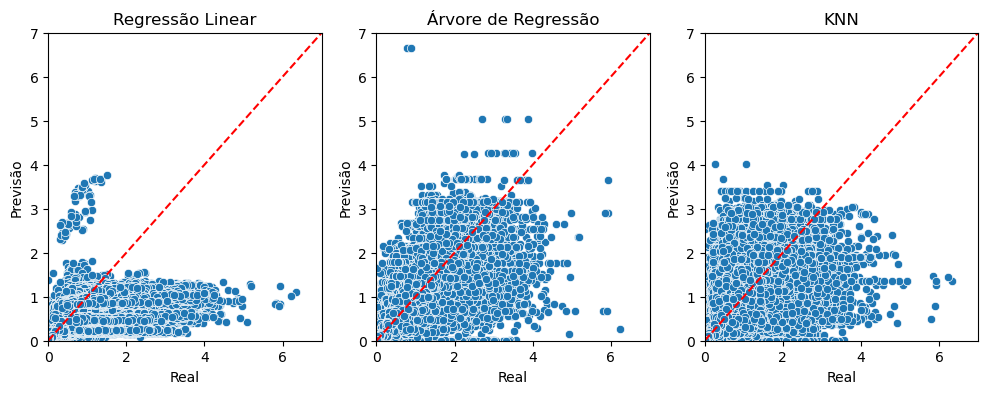

In [172]:
# Criando o gráfico

fig = plt.figure(figsize=(12, 4))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])
ax3 = fig.add_subplot(specs[:, 2])

# Primeiro gráfico
ax1 = sns.scatterplot(x=y_val/5000, y=y_rl/5000, ax=ax1)
ax1.plot([0, 70000], [0, 70000], '--r')
ax1.set(xlim=(0, 7), ylim=(0, 7))
ax1.set_xlabel('Real')
ax1.set_ylabel('Previsão')
ax1.set(title='Regressão Linear')

# Segundo gráfico
ax2 = sns.scatterplot(x=y_val/5000, y=y_ar/5000, ax=ax2)
ax2.plot([0, 70000], [0, 70000], '--r')
ax2.set(xlim=(0, 7), ylim=(0, 7))
ax2.set_xlabel('Real')
ax2.set_ylabel('Previsão')
ax2.set(title='Árvore de Regressão')

# Terceiro gráfico
ax3 = sns.scatterplot(x=y_val/5000, y=y_knn/5000, ax=ax3)
ax3.plot([0, 70000], [0, 70000], '--r')
ax3.set(xlim=(0, 7), ylim=(0, 7))
ax3.set_xlabel('Real')
ax3.set_ylabel('Previsão')
ax3.set(title='KNN')

* Vamos usar a árvore de regressão por ter sido o algoritmo com menor erro.

### Fazendo a previsão para a base de teste

In [179]:
# Antes, precisamos fazer os tratamenos no conjunto de teste também
test_2['family_encoded'] = test_2['family'].map(encoding_dict['family'])

In [181]:
test_2.drop(['family'], axis=1, inplace=True)

In [175]:
test_2.head()

In [182]:
# Árvore de regressão
y_pred = reg_ar.predict(test_2.drop('id', axis=1))

In [183]:
# Criando uma cópia da base com a coluna de previsão
test_2_pred = test_2.copy()
test_2_pred['sales'] = y_pred

In [184]:
test_2_pred.head()

,id,store_nbr,onpromotion,year,month,day,family_encoded,sales
0,3000888,1,0,2017,8,16,5.573921,1.0
1,3000889,1,0,2017,8,16,0.036427,0.0
2,3000890,1,2,2017,8,16,2.911817,6.0
3,3000891,1,20,2017,8,16,1886.687814,2092.0
4,3000892,1,0,2017,8,16,0.000000,0.0


In [186]:
# Extrair somente o id e o sale
resultado = test_2_pred[['id', 'sales']]

In [187]:
# Exportando a base
resultado.to_csv('resultado.csv', index=False)

### Resultados

O primeiro resultado que obtivemos no Kaggle foi 0.95